# **Diabetes Prediction Usin SVM**

**importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pickle

Reading Dataset


In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/DiabetesDataset.csv')

In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,13,145,96,35,146,36.6,0.354,51,1
1,10,142,93,34,146,36.6,0.204,51,1
2,6,112,94,2,0,37.6,0.291,30,0
3,1,196,69,46,543,30.5,0.108,53,1
4,4,115,73,1,0,25.6,0.151,30,0


In [ ]:
diabetes_dataset.shape


(1260, 9)

In [ ]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,5.621429,132.623016,70.168254,19.170635,116.529365,31.268413,0.476971,39.173810,0.615873
std,3.942842,32.926494,22.472582,16.720244,196.749471,8.579038,0.437154,11.551485,0.486581
min,0.000000,76.000000,0.000000,0.000000,0.000000,0.000000,0.034000,21.000000,0.000000
25%,2.000000,112.000000,65.750000,2.000000,0.000000,27.100000,0.237000,30.000000,0.000000
50%,6.000000,125.000000,73.000000,21.000000,0.000000,31.000000,0.354000,34.000000,1.000000
75%,9.000000,148.000000,84.000000,34.000000,146.000000,37.600000,0.572000,51.000000,1.000000
max,15.000000,199.000000,98.000000,49.000000,846.000000,45.800000,2.388000,59.000000,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

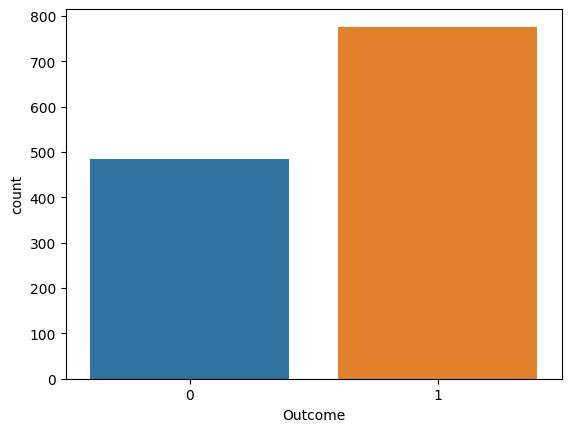

In [ ]:
sns.countplot(x = 'Outcome' , data = diabetes_dataset)

In [ ]:
diabetes_dataset['Outcome'].value_counts()

1    776
0    484
Name: Outcome, dtype: int64

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,5.564050,112.417355,72.873967,13.092975,53.055785,30.483471,0.432426,35.956612
1,5.657216,145.225515,68.480670,22.961340,156.118557,31.757990,0.504754,41.180412


In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              13      145             96             35      146  36.6   
1              10      142             93             34      146  36.6   
2               6      112             94              2        0  37.6   
3               1      196             69             46      543  30.5   
4               4      115             73              1        0  25.6   
...           ...      ...            ...            ...      ...   ...   
1255            9      149             78              2        0  39.4   
1256            7      196             90              0        0  39.8   
1257            1      138             41             36      168  43.1   
1258           12      170             76              2        0  38.0   
1259            6      181             62              2        0  23.3   

      DiabetesPedigreeFunction  Age  
0                        0.354   51  
1                      

In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       0
       ..
1255    1
1256    1
1257    1
1258    1
1259    1
Name: Outcome, Length: 1260, dtype: int64


In [ ]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)
print(standardized_data)
X = standardized_data

[[ 1.87212688  0.37604667  1.14993474 ...  0.62171357 -0.28140979
   1.02418748]
 [ 1.11095235  0.28489845  1.01638573 ...  0.62171357 -0.62467442
   1.02418748]
 [ 0.09605298 -0.62658369  1.06090207 ...  0.73832304 -0.42558094
  -0.79448246]
 ...
 [-1.17257124  0.1633675  -1.29846386 ...  1.37967513  4.25883699
  -0.53467246]
 [ 1.61840204  1.13561512  0.25960798 ...  0.78496683  0.36621613
  -0.44806913]
 [ 0.09605298  1.46982525 -0.36362076 ... -0.92919238  0.21746813
  -0.62127579]]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1260, 8) (1008, 8) (252, 8)


In [ ]:
classifier = svm.SVC(kernel='linear')
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8680555555555556


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8174603174603174


In [ ]:
input_data = (7,119,94,2,0,34.1,0.437,38)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic :-) ')
else:
  print('The person is diabetic :-( ')

[[ 0.34977782 -0.41390453  1.06090207 -1.0273446  -0.592508    0.33018989
  -0.09147003 -0.10165581]]
[0]
The person is not diabetic :-) 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


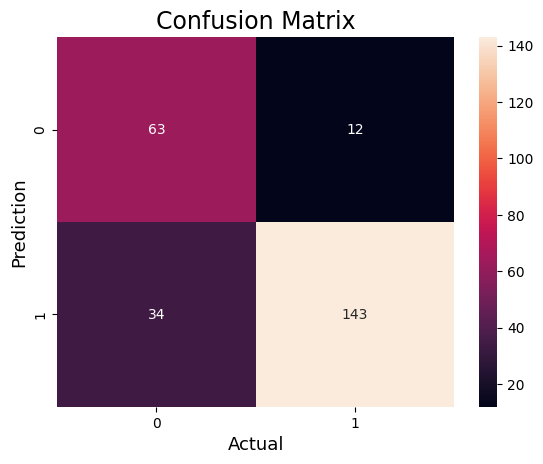

In [ ]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(X_test_prediction,Y_test)
sns.heatmap(cm,
            annot=True,
            fmt='g'
)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:

filename="diabetesmodel.sav"
pickle.dump(classifier,open(filename,'wb'))